In [1]:
import nltk
#nltk.download()
import numpy as np
import matplotlib.pyplot as plt
import re

#pip install wordcloud
#from wordcloud import WordCloud

from nltk import FreqDist
from unicodedata import normalize
%matplotlib inline

In [2]:
texto = '''
O que é o Lorem Ipsum?
O Lorem Ipsum é um texto modelo da indústria tipográfica e de impressão. 
O Lorem Ipsum tem vindo a ser o texto padrão usado por estas indústrias desde o ano de 1500, quando uma misturou os caracteres de um texto para criar um espécime de livro. 
Este texto não só sobreviveu 5 séculos, mas também o salto para a tipografia electrónica, mantendo-se essencialmente inalterada. 
Foi popularizada nos anos 60 com a disponibilização das folhas de Letraset, que continham passagens com Lorem Ipsum, e mais recentemente com os programas de publicação como o Aldus PageMaker que incluem versões do Lorem Ipsum.

Porque é que o usamos?
É um facto estabelecido de que um leitor é distraído pelo conteúdo legível de uma página quando analisa a sua mancha gráfica. 
Logo, o uso de Lorem Ipsum leva a uma distribuição mais ou menos normal de letras, ao contrário do uso de "Conteúdo aqui, conteúdo aqui", tornando-o texto legível. 
Muitas ferramentas de publicação electrónica e editores de páginas web usam actualmente o Lorem Ipsum como o modelo de texto usado por omissão, e uma pesquisa por "lorem ipsum" irá encontrar muitos websites ainda na sua infância. 
Várias versões têm evoluído ao longo dos anos, por vezes por acidente, por vezes propositadamente (como no caso do humor).

Exemplo de URL:
http://127.0.0.1/
http://127.0.0.1
www.google.com
'''

In [4]:
def minusculo(s):
    return s.lower()

In [5]:
def tokenizar(s):
    toke = nltk.word_tokenize(s)
    toke = nltk.pos_tag(toke)
    return toke
#nltk.help.upenn_tagset('NNP')

In [6]:
def contagem_palavras(s):
    contagem = tokenizar(s)
    contagem = FreqDist(contagem)
    return contagem

In [7]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras=[]
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [8]:
def Pontuacao(s):
    return re.sub(r'[-./?!,":;()\']',' ',s)

In [11]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords

['de',
 'a',
 'o',
 'que',
 'e',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera',
 'es

In [9]:
def RemoveStopWords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [10]:
def RemoveAcentos(s):
    return normalize('NFKD', s).encode('ASCII', 'ignore').decode('ASCII')

In [13]:
def RemoveURL(s):
    # Código-Fonte utilizado para remoção de hashtags e URLs do corpus
    # Remove as hashtags do corpus pattern = re.compile(r'\#\w+') raw = pattern.sub('', raw)
    # Remove as URLs do corpus
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return pattern.sub('', s)
    

In [16]:
s = texto 
s = Pontuacao(s)
s = minusculo(s)
s = RemoveAcentos(s)
s = RemoveStopWords(s)
s = RemoveURL(s)
s
#print (Stemming(s))
#print (tokenizar())
#contagem_palavras()

'lorem ipsum lorem ipsum texto modelo industria tipografica impressao lorem ipsum vindo ser texto padrao usado industrias desde ano 1500 misturou caracteres texto criar especime livro texto nao so sobreviveu 5 seculos tambem salto tipografia electronica mantendo essencialmente inalterada popularizada anos 60 disponibilizacao folhas letraset continham passagens lorem ipsum recentemente programas publicacao aldus pagemaker incluem versoes lorem ipsum porque usamos facto estabelecido leitor distraido conteudo legivel pagina analisa mancha grafica logo uso lorem ipsum leva distribuicao menos normal letras contrario uso conteudo aqui conteudo aqui tornando texto legivel muitas ferramentas publicacao electronica editores paginas web usam actualmente lorem ipsum modelo texto usado omissao pesquisa lorem ipsum ira encontrar muitos websites ainda infancia varias versoes evoluido longo anos vezes acidente vezes propositadamente caso humor exemplo url http 127 0 0 1 http 127 0 0 1 www google'

In [20]:
#bigrm = list(nltk.bigrams(s.split()))
#print(*map(' '.join, bigrm), sep=', ')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

def get_bigrams(myString):
    tokenizer = WordPunctTokenizer()
    tokens = tokenizer.tokenize(myString)
    stemmer = PorterStemmer()
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 500)

    for bigram_tuple in bigrams:
        x = "%s %s" % bigram_tuple
        tokens.append(x)

    result = [' '.join([stemmer.stem(w).lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english') and len(x) > 8]
    return result

contagem = FreqDist(get_bigrams(s))
contagem

FreqDist({'1500 mistur': 1,
          '5 seculo': 1,
          '60 disponibilizacao': 1,
          'acident veze': 1,
          'actualment': 1,
          'actualment lorem': 1,
          'ainda infancia': 1,
          'aldu pagemak': 1,
          'analisa mancha': 1,
          'ano veze': 1,
          'aqui conteudo': 1,
          'aqui tornando': 1,
          'caracter': 1,
          'caracter texto': 1,
          'caso humor': 1,
          'conteudo aqui': 1,
          'conteudo legivel': 1,
          'continham': 1,
          'continham passagen': 1,
          'contrario': 1,
          'contrario uso': 1,
          'criar especim': 1,
          'desd ano': 1,
          'disponibilizacao': 1,
          'disponibilizacao folha': 1,
          'distraido': 1,
          'distraido conteudo': 1,
          'distribuicao': 1,
          'distribuicao meno': 1,
          'editor pagina': 1,
          'electronica': 2,
          'electronica editor': 1,
          'electronica mantendo': 1,
  

In [23]:
bigrm = list(nltk.bigrams(s.split()))
#print(*map(' '.join, bigrm), sep=', ')
contagem = map(' '.join, bigrm)
contagem = FreqDist(contagem)
contagem

FreqDist({'0 0': 2,
          '0 1': 2,
          '1 http': 1,
          '1 www': 1,
          '127 0': 2,
          '1500 misturou': 1,
          '5 seculos': 1,
          '60 disponibilizacao': 1,
          'acidente vezes': 1,
          'actualmente lorem': 1,
          'ainda infancia': 1,
          'aldus pagemaker': 1,
          'analisa mancha': 1,
          'ano 1500': 1,
          'anos 60': 1,
          'anos vezes': 1,
          'aqui conteudo': 1,
          'aqui tornando': 1,
          'caracteres texto': 1,
          'caso humor': 1,
          'conteudo aqui': 2,
          'conteudo legivel': 1,
          'continham passagens': 1,
          'contrario uso': 1,
          'criar especime': 1,
          'desde ano': 1,
          'disponibilizacao folhas': 1,
          'distraido conteudo': 1,
          'distribuicao menos': 1,
          'editores paginas': 1,
          'electronica editores': 1,
          'electronica mantendo': 1,
          'encontrar muitos': 1,
          

In [29]:
from nltk import word_tokenize
from nltk.util import ngrams
token=nltk.word_tokenize(s)
bigrams=ngrams(token,2)
trigrams=ngrams(token,3)
#FreqDist(bigrams)
FreqDist(trigrams)

FreqDist({('0', '0', '1'): 2,
          ('0', '1', 'http'): 1,
          ('0', '1', 'www'): 1,
          ('1', 'http', '127'): 1,
          ('1', 'www', 'google'): 1,
          ('127', '0', '0'): 2,
          ('1500', 'misturou', 'caracteres'): 1,
          ('5', 'seculos', 'tambem'): 1,
          ('60', 'disponibilizacao', 'folhas'): 1,
          ('acidente', 'vezes', 'propositadamente'): 1,
          ('actualmente', 'lorem', 'ipsum'): 1,
          ('ainda', 'infancia', 'varias'): 1,
          ('aldus', 'pagemaker', 'incluem'): 1,
          ('analisa', 'mancha', 'grafica'): 1,
          ('ano', '1500', 'misturou'): 1,
          ('anos', '60', 'disponibilizacao'): 1,
          ('anos', 'vezes', 'acidente'): 1,
          ('aqui', 'conteudo', 'aqui'): 1,
          ('aqui', 'tornando', 'texto'): 1,
          ('caracteres', 'texto', 'criar'): 1,
          ('caso', 'humor', 'exemplo'): 1,
          ('conteudo', 'aqui', 'conteudo'): 1,
          ('conteudo', 'aqui', 'tornando'): 1,
         

In [62]:
def frequencia(s):
    palavras = contagem_palavras(s)
    #print (palavras)
    #palavras = palavras.keys()
    y_pos = np.arange(len(palavras))
    contagem = palavras.values()
    plt.bar(y_pos, contagem, align='center', alpha=0.5)
    plt.xticks(y_pos, palavras)
    plt.ylabel('Frequencia')
    plt.title('Frequencia das palavras na frase')
    plt.show()

<FreqDist with 99 samples and 123 outcomes>


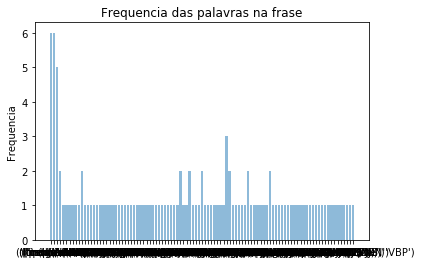

In [63]:
frequencia(s)

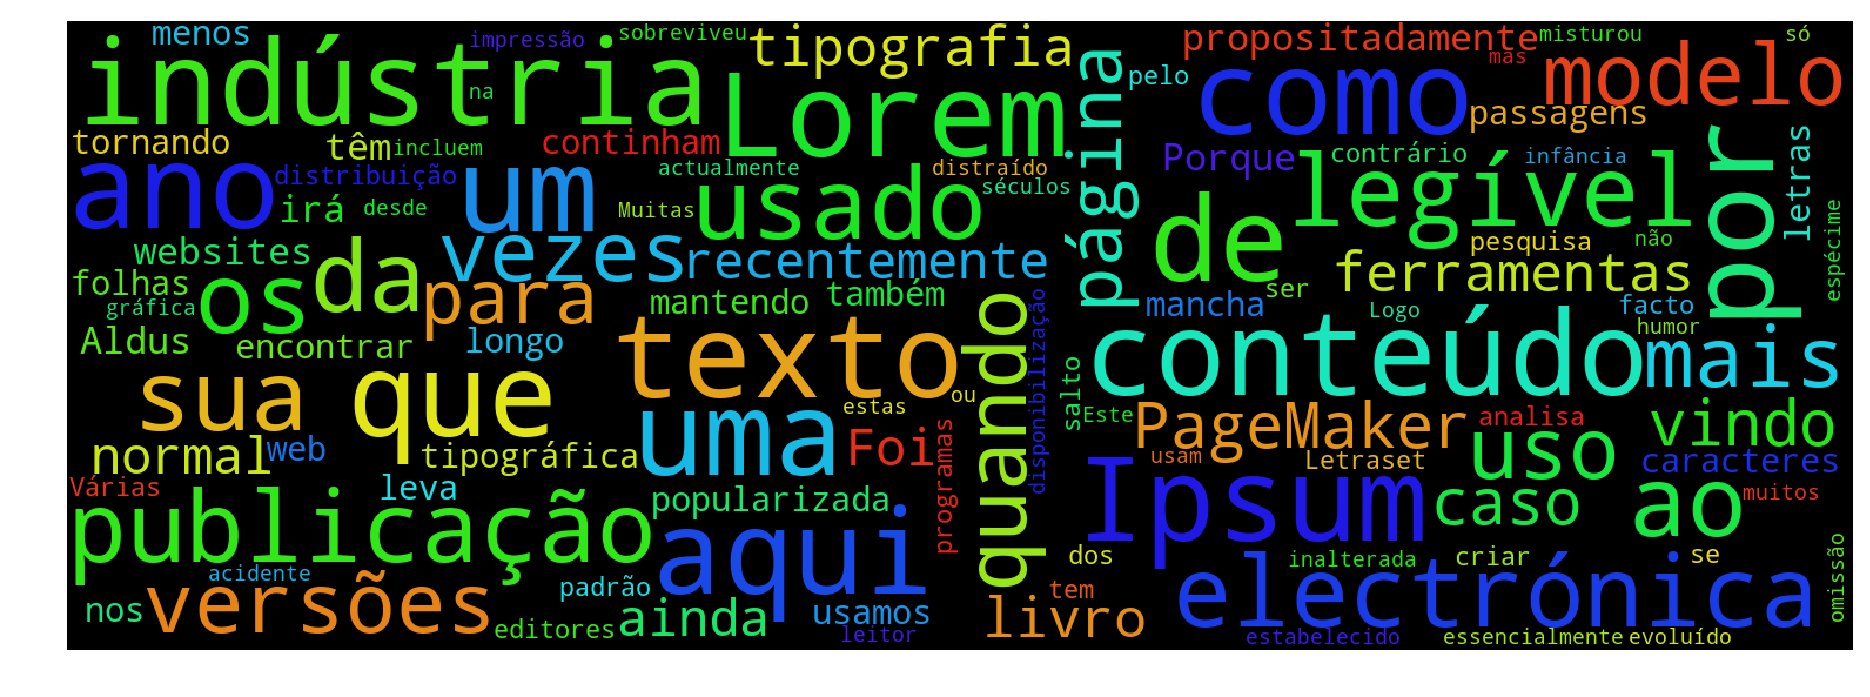

In [25]:
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(texto)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()